In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbr
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
le = preprocessing.LabelEncoder()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
from sklearn import metrics
from sklearn import preprocessing

In [2]:
# let's open csv
data_raw = pd.read_csv('cinema1.csv')
data_raw.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,8,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN,1,0
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN,3,0
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,9,0


In [3]:
# preparing data
data_sp = data_raw.copy()
data_sp = data_sp.drop(data_sp[(data_sp.isnull().sum(axis = 1)/data_sp.shape[1])*100 > 15].index)
del data_sp ['Unnamed: 28']
del data_sp['Unnamed: 0']

data_sp = data_sp.fillna(data_sp.mean())

data_sp = data_sp.drop(data_sp[data_sp['movie_facebook_likes'] > (data_sp['movie_facebook_likes'].mean() +  3 * data_sp['movie_facebook_likes'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['movie_facebook_likes'] < (data_sp['movie_facebook_likes'].mean() -  3 * data_sp['movie_facebook_likes'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['gross'] > (data_sp['gross'].mean() +  3 * data_sp['gross'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['gross'] < (data_sp['gross'].mean() -  3 * data_sp['gross'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['actor_1_facebook_likes'] > (data_sp['actor_1_facebook_likes'].mean() +  3 * data_sp['actor_1_facebook_likes'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['actor_1_facebook_likes'] < (data_sp['actor_1_facebook_likes'].mean() -  3 * data_sp['actor_1_facebook_likes'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['aspect_ratio'] > (data_sp['aspect_ratio'].mean() +  3 * data_sp['aspect_ratio'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['aspect_ratio'] < (data_sp['aspect_ratio'].mean() -  3 * data_sp['aspect_ratio'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['budget'] > (data_sp['budget'].mean() +  3 * data_sp['budget'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['budget'] < (data_sp['budget'].mean() -  3 * data_sp['budget'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['duration'] > (data_sp['duration'].mean() +  3 * data_sp['duration'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['duration'] < (data_sp['duration'].mean() -  3 * data_sp['duration'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['title_year'] > (data_sp['title_year'].mean() +  3 * data_sp['title_year'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['title_year'] < (data_sp['title_year'].mean() -  3 * data_sp['title_year'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['imdb_score'] > (data_sp['imdb_score'].mean() +  3 * data_sp['imdb_score'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['imdb_score'] < (data_sp['imdb_score'].mean() -  3 * data_sp['imdb_score'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['num_critic_for_reviews'] > (data_sp['num_critic_for_reviews'].mean() +  3 * data_sp['num_critic_for_reviews'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['num_critic_for_reviews'] < (data_sp['num_critic_for_reviews'].mean() -  3 * data_sp['num_critic_for_reviews'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['cast_total_facebook_likes'] > (data_sp['cast_total_facebook_likes'].mean() +  3 * data_sp['cast_total_facebook_likes'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['cast_total_facebook_likes'] < (data_sp['cast_total_facebook_likes'].mean() -  3 * data_sp['cast_total_facebook_likes'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['director_facebook_likes'] > (data_sp['director_facebook_likes'].mean() +  3 * data_sp['director_facebook_likes'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['director_facebook_likes'] < (data_sp['director_facebook_likes'].mean() -  3 * data_sp['director_facebook_likes'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['actor_2_facebook_likes'] > (data_sp['actor_2_facebook_likes'].mean() +  3 * data_sp['actor_2_facebook_likes'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['actor_2_facebook_likes'] < (data_sp['actor_2_facebook_likes'].mean() -  3 * data_sp['actor_2_facebook_likes'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['actor_3_facebook_likes'] > (data_sp['actor_3_facebook_likes'].mean() +  3 * data_sp['actor_3_facebook_likes'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['actor_3_facebook_likes'] < (data_sp['actor_3_facebook_likes'].mean() -  3 * data_sp['actor_3_facebook_likes'].std()) ].index)

data_sp['num_voted_users'] = data_sp['num_voted_users'].astype(float)
data_sp = data_sp.drop(data_sp[data_sp['num_voted_users'] > (data_sp['num_voted_users'].mean() +  3 * data_sp['num_voted_users'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['num_voted_users'] < (data_sp['num_voted_users'].mean() -  3 * data_sp['num_voted_users'].std()) ].index)


data_sp = (data_sp.set_index(data_sp.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'}))
data_sp.head()
data_sp.shape[0]
#print(data_sp.shape[1])

data_sp = data_sp.drop(data_sp[data_sp['genres'] != 'Sci-Fi'].index)


In [4]:
# using LabelEncoding for some columns
data_reg = pd.DataFrame (data_sp, columns = ['director_name', 'imdb_score', 'actor_1_name', 'cast_total_facebook_likes', 'genres', 'gross', 'num_critic_for_reviews', 'duration', 'title_year', 'actor_2_facebook_likes', 'actor_2_name', 'country', 'language', 'color', 'num_voted_users','director_facebook_likes', 'content_rating', 'budget', 'aspect_ratio', 'actor_1_facebook_likes', 'actor_3_facebook_likes' ])
data_reg['genres'] = data_reg['genres'].astype(str)
data_reg['genres'] = le.fit_transform(data_reg['genres'])

data_reg['director_name'] = data_reg['director_name'].astype(str)
data_reg['director_name'] = le.fit_transform(data_reg['director_name'])

data_reg['actor_1_name'] = data_reg['actor_1_name'].astype(str)
data_reg['actor_1_name'] = le.fit_transform(data_reg['actor_1_name'])

data_reg['color'] = data_reg['color'].astype(str)
data_reg['color'] = le.fit_transform(data_reg['color'])

data_reg['language'] = data_reg['language'].astype(str)
data_reg['language'] = le.fit_transform(data_reg['language'])

data_reg['country'] = data_reg['country'].astype(str)
data_reg['country'] = le.fit_transform(data_reg['country'])

data_reg['content_rating'] = data_reg['content_rating'].astype(str)
data_reg['content_rating'] = le.fit_transform(data_reg['content_rating'])

data_reg['actor_2_name'] = data_reg['actor_2_name'].astype(str)
data_reg['actor_2_name'] = le.fit_transform(data_reg['actor_2_name'])


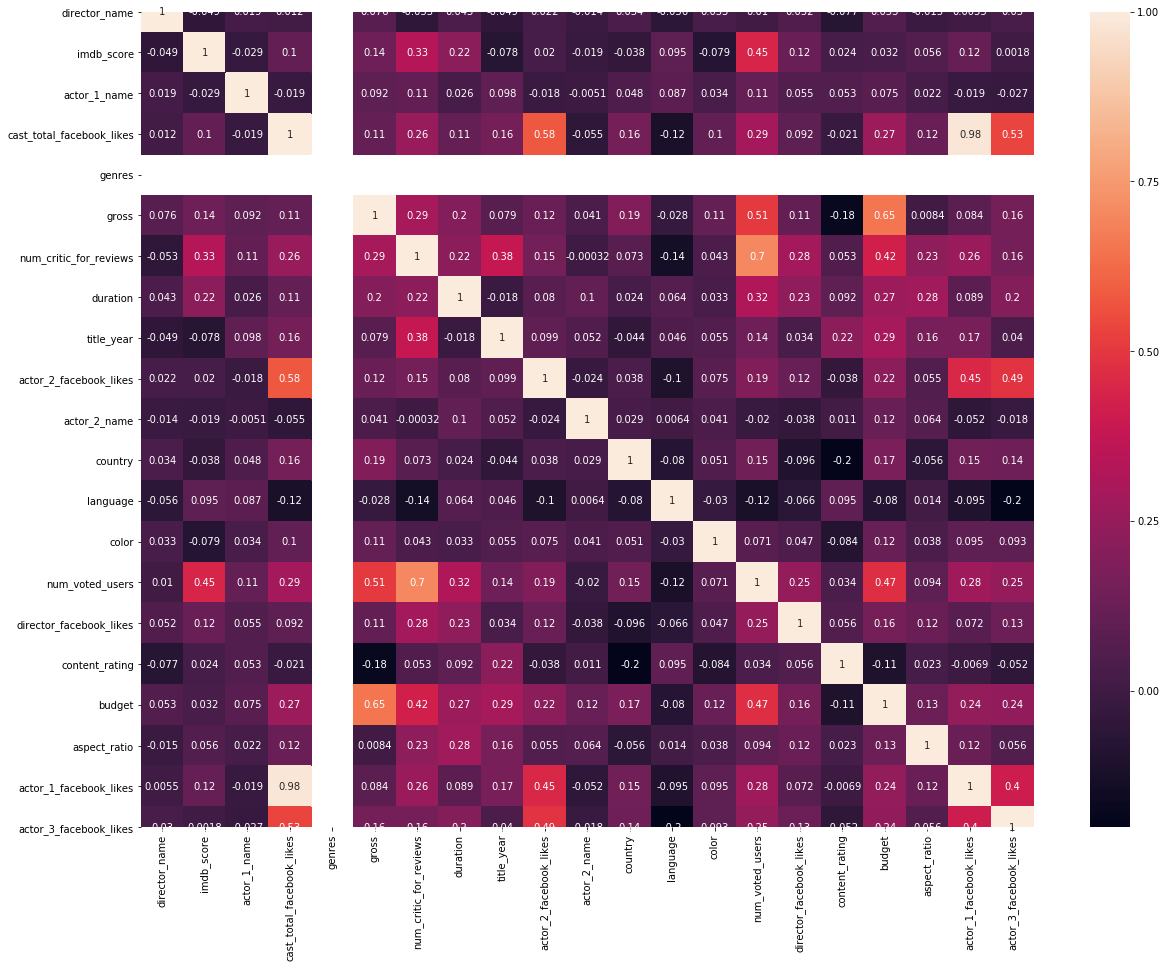

In [5]:
# let's see correlation table
plt.figure(figsize=(20, 15))
M = data_reg.corr()
sbr.heatmap(M, cbar=True, annot=True)

In [6]:
data_reg.genres.head()

18    0
33    0
41    0
44    0
58    0
Name: genres, dtype: int32

In [7]:
X = data_reg[['director_name', 'actor_1_name','imdb_score', 'cast_total_facebook_likes', 'num_critic_for_reviews', 'content_rating', 'country','language', 'duration', 'num_voted_users', 'budget', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'genres']]
Y = data_reg.gross

In [8]:
score=0
i=0
while score<0.7:
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y)
    reg = LinearRegression().fit(X_train, Y_train)
    #reg = BayesianRidge().fit(X_train, Y_train)
    reg.fit(X_train, Y_train)
    reg.predict(X_test)
    score=reg.score(X_test,Y_test)
    i = i+1
    
print(i)
print(score)
print(reg.intercept_)
print(reg.coef_)


7743
0.728562765305121
32999029.46060002
[-4.45777468e+03  2.59022402e+04  5.89877009e+05  4.07323121e+03
 -8.30621167e+04 -3.46999319e+06  3.17377771e+05  2.58871851e+06
 -1.03230668e+05  2.38733206e+02  5.12774002e-01 -4.68901615e+03
 -3.28066862e+03 -1.42665821e+04  0.00000000e+00]


In [9]:
y_pred = reg.predict(X_test)
d_pred = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': y_pred.flatten()})
d_pred

,Actual,Predicted
0,14358033.0,4.346457e+07
1,10996440.0,1.239045e+07
2,5773519.0,2.657506e+07
3,79363785.0,6.479381e+07
4,131920333.0,1.133295e+08
...,...,...
101,11576087.0,3.592500e+07
102,41997790.0,3.529194e+07
103,2840417.0,2.632175e+07
104,79948113.0,6.142886e+07


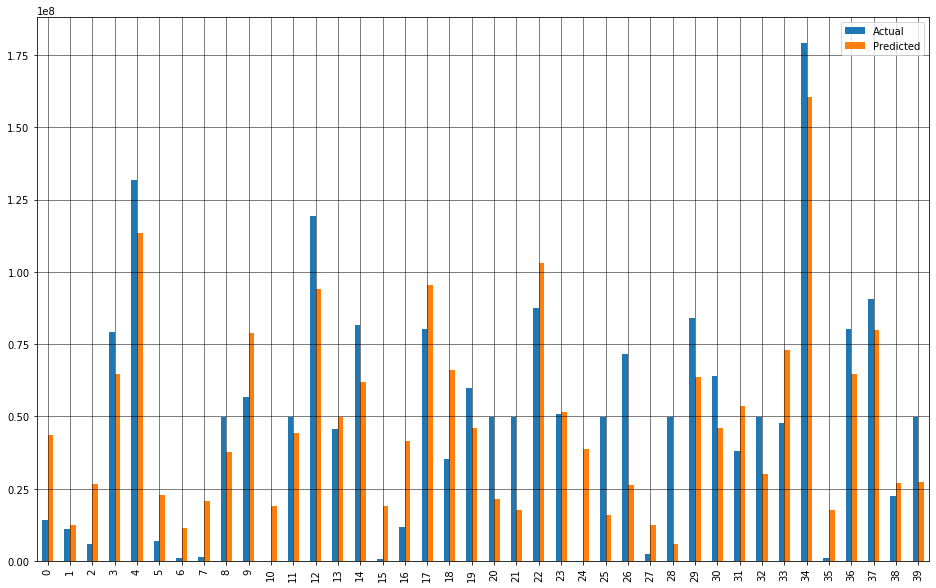

In [10]:
df1 = d_pred.head(40)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.show()

In [11]:
data_reg.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False)

director_name
128    8.4
105    8.2
7      8.1
258    8.0
163    8.0
      ... 
103    3.5
315    3.4
36     3.4
321    3.4
68     3.1
Name: imdb_score, Length: 326, dtype: float64

In [12]:
data_reg.groupby('actor_1_name')['actor_1_facebook_likes'].mean().sort_values(ascending=False)

actor_1_name
136    33000.0
299    27000.0
126    26000.0
2      25000.0
115    24000.0
        ...   
315       29.0
81        29.0
222       23.0
42         5.0
26         2.0
Name: actor_1_facebook_likes, Length: 319, dtype: float64

In [13]:
d  = data_reg.drop(data_reg[data_reg['director_name'] != 128 ].index)
d.head()

,director_name,imdb_score,actor_1_name,cast_total_facebook_likes,genres,gross,num_critic_for_reviews,duration,title_year,actor_2_facebook_likes,actor_2_name,country,language,color,num_voted_users,director_facebook_likes,content_rating,budget,aspect_ratio,actor_1_facebook_likes,actor_3_facebook_likes
9164,128,8.4,207,5526,0,4.966678e+07,44.0,148.0,2013.0,774.0,231,17,2,1,30434.0,41.0,5,3500000.0,2.123663,2000.0,739.0


In [14]:
print (reg.predict([[128, 136, data_reg['imdb_score'].mean(),
                                             data_reg['cast_total_facebook_likes'].mean(),                                         
                                             data_reg['num_critic_for_reviews'].mean(),
                                             data_reg['content_rating'].mean(),
                                             data_reg['country'].mean(),
                                             data_reg['language'].mean(),
                                             data_reg['duration'].mean(),
                                             data_reg['num_voted_users'].mean(),
                                             data_reg['budget'].mean(),
                                             data_reg['actor_1_facebook_likes'].mean(),
                                             data_reg['actor_2_facebook_likes'].mean(),
                                             data_reg['actor_3_facebook_likes'].mean(),
                                             data_reg['genres'].mean()
                                           ]]))
                                             

[45580253.17784449]
